<a href="https://colab.research.google.com/github/sagihaider/CE880/blob/main/week10/Case_Study_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Changing numpy settings so that it prints arrays without truncation.
np.set_printoptions(threshold=np.inf)

In [2]:
# Clone Data from GitHub
!git clone https://github.com/sagihaider/Basic_ML_datasets.git

Cloning into 'Basic_ML_datasets'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 51 (delta 9), reused 0 (delta 0), pack-reused 27
Unpacking objects: 100% (51/51), done.


### Assigning the data to variables

In [3]:
train_data = pd.read_csv('/content/Basic_ML_datasets/Titanic_Kaggle/train.csv')
test_data = pd.read_csv('/content/Basic_ML_datasets/Titanic_Kaggle/test.csv')
data = [train_data, test_data]

for dataset in data:
    display(dataset)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Data Visualization

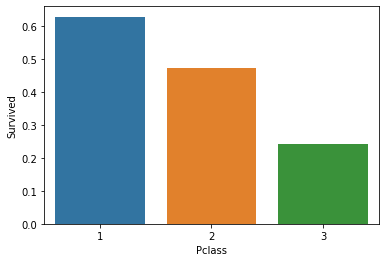

In [4]:
# Pclass vs Survival
pclass_plot = sns.barplot(x='Pclass', y='Survived', data=train_data, ci=None)

The barplot above shows that survival rate is affected by the Pclass. Passengers belonging to class 1 had a higher chance of survival than those belonging to class 2 who had a higher chance of surviving than those belonging to class 3. Thus, Pclass would prove to be an important feature for our machine learning model.

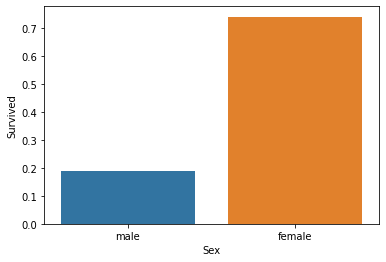

In [5]:
# Age vs Survival
gender_plot = sns.barplot(data=train_data, x='Sex', y='Survived', ci=None)

The barplot below shows that gender also affected the survival rate. Females had a higher chance of survival. Gender would also prove an important feature for our machine learning model.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


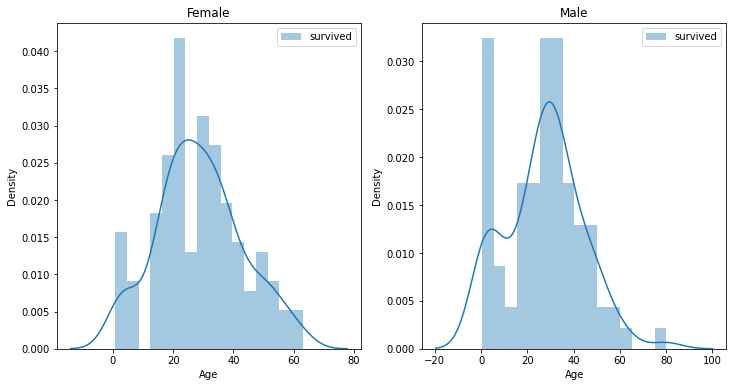

In [7]:
# Age and Sex vs Survival
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[12,6])
female = train_data[train_data['Sex'] == 'female']
male = train_data[train_data['Sex'] == 'male']

female_plot = sns.distplot(female[female['Survived'] == 1].Age.dropna(), bins=16, kde=True, label='survived', ax=axes[0])
female_plot.set_title('Female')
female_plot.legend();

male_plot = sns.distplot(male[male['Survived'] == 1].Age.dropna(), bins=16, kde=True, label='survived', ax=axes[1])
male_plot.set_title('Male')
male_plot.legend();

Visualizing sex and age together leads to important conclusions regarding the data. As seen below, age impacted the survival rate differently depending on the sex. 
* For females, the highest survival rate was for passengers aged between 20 and 22, while the lowest survival rate was between 55 and 62. There were no female survivers aged around 10.
* For males, the highest survival rate was between 0 and 5 years and also between 25 and 35 years, while the lowest survival rate between 60 and 65. There were no male survivors aged around 70 years.

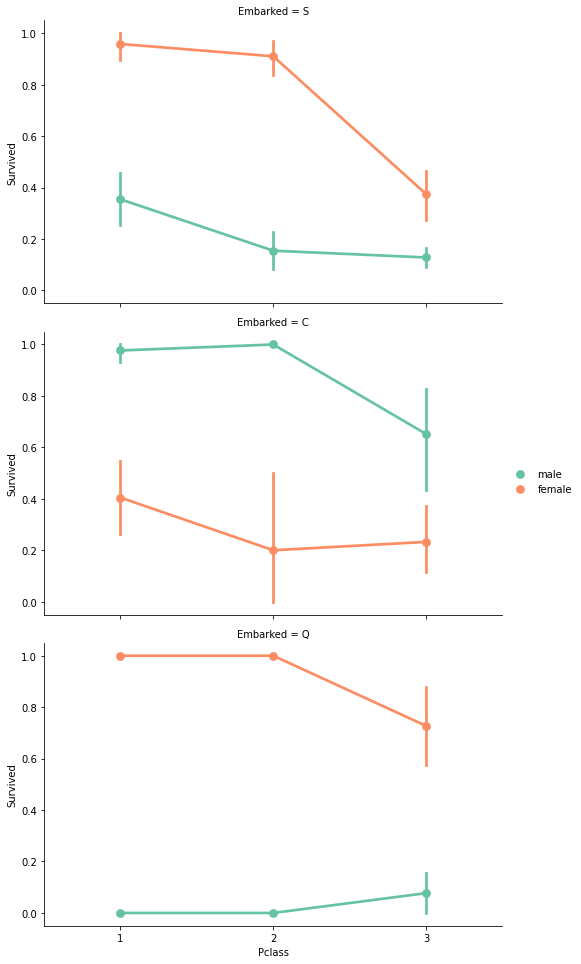

In [9]:
# Port of Embarkation and Sex vs Survival
FacetGrid = sns.FacetGrid(train_data, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='Set2', order=None, hue_order=None)
FacetGrid.add_legend();

Port of Embarkation and its effect varied between sexes. Most female survivors had embarked from port Q while most male survivors had embarked from port C. 

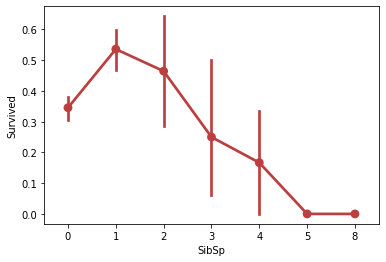

In [10]:
# Siblings & Spouses vs Survival

sibsp_plot = sns.pointplot(x='SibSp', y='Survived', data=train_data, color='#bb3f3f')

The pointplot above shows that the greater number of siblings/spouses a passenger had, the lesser was their chance of survival, with the exception of having 0 siblings/spouses who had a lesser chance of survival than having 1 or 2.

### Data Preprocessing

#### Dropping unimportant features

Our first step in data preprocessing is to check which features do not influence the dependent variable, survival rate, and drop them from our train and test data.

In [11]:
# Dropping the PassengerId and Name due to negligible contribution

train_data.drop(columns=['PassengerId', 'Name'], inplace=True)
test_data.drop(columns=['Name'], inplace=True)
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


After visualizing the data as a pandas dataFrame, we can conclude that it is safe to drop PassengerId and Name from the data because they do not affect the survival rate.

In [12]:
train_data['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

Another interesting feature to consider is the ticket. As seen above, the Ticket column has 681 unique values. It is not practical nor efficient to include a categorical feature with that many unique categories. So, we can drop the Ticket column from our data too.

In [13]:
# Dropping Ticket feature because it has too many unique values

train_data.drop(columns=['Ticket'], inplace=True)
test_data.drop(columns=['Ticket'], inplace=True)
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


#### Tackling the missing data

Next step is to visualize missing data and see if there are any other columns we can drop or if any columns has empty values which need to be taken care.

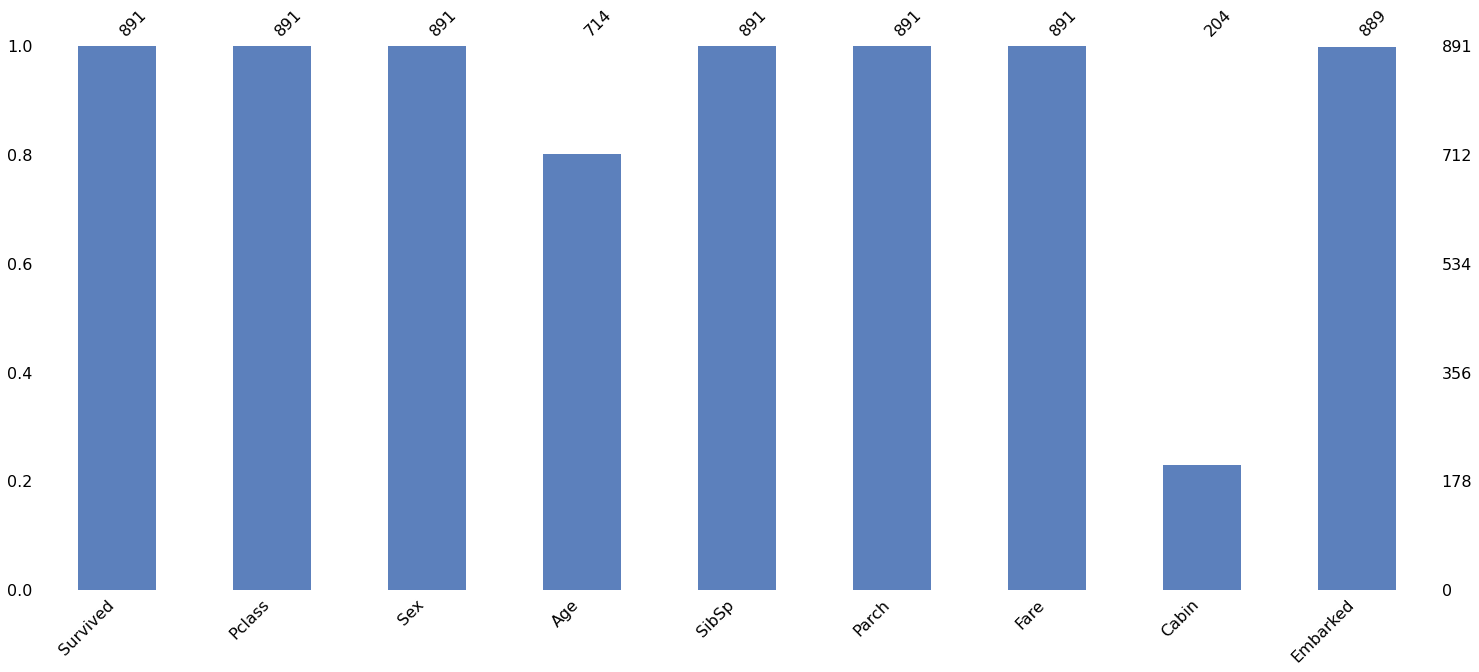

In [14]:
# Visualizing missing data
import missingno as msno
msno.bar(train_data, color=(92/255, 128/255, 188/255))

As seen above, Cabin column is missing around 80 percent of data. It is not practical to try and predict the missing data before we can train our machine learning model. So we are going to drop the Cabin column too.

In [15]:
# Dropping cabin because too much missing data.

for dataset in data:
    dataset.drop(columns=['Cabin'], inplace=True)

In [16]:
# Checking the percentage of missing data in each feature.

dataset.isna().mean().round(4) * 100

PassengerId     0.00
Pclass          0.00
Sex             0.00
Age            20.57
SibSp           0.00
Parch           0.00
Fare            0.24
Embarked        0.00
dtype: float64

The only two features with missing data are Age (19.87%) and Embarked (0.22).
* The best way to fill missing data for Age is to use mean.
* The best way to fill missing data for Embarked is to use mode because it is categorical.

In [17]:
# Checking the most common value in Embarked
for dataset in data:
    display(dataset['Embarked'].describe())

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

count     418
unique      3
top         S
freq      270
Name: Embarked, dtype: object

As seen above, for both train and test data, the most common value in Embarked is port S. So, we will use that value to fill missing data.

In [18]:
# Using mode for Port of Embarkation because it is categorical and mean is not possible.
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna("S")

In [19]:
# Using the mean to fill Age.
for dataset in data:
    mean = dataset['Age'].mean()
    dataset['Age'] = dataset['Age'].fillna(mean)

In [20]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

As seen above, the test data is also missing one Fare value, which we can full using the mean

In [21]:
# Test data is missing 1 value for Fare. Analyzing fare reveals that 
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

#### Converting Features

Next step is to convert non-integer features to the type int64.

In [22]:
# Analyzing to check which features need conversion.
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


* Age and Fare features are of the type float. We can convert them to int64 using pandas, as shown below.
* Sex and Embarked features are categorical. It is better to One Hot Encode them.

In [ ]:
# Converting Age and Fare to int64

for dataset in data:
    dataset['Age'] = dataset['Age'].astype('int64')
    dataset['Fare'] = dataset['Fare'].astype('int64')

In [ ]:
# Dividing the data into two arrays: independent variables and dependent variables, before we can One Hot Encode the
# categorical data of Sex and Embarked

X_train = train_data.iloc[:,1:].values
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values

In [ ]:
# One Hot Encoding Sex

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [6])], remainder='passthrough')
X_train = np.array(ct.fit_transform(X_train))
X_test = np.array(ct.fit_transform(X_test))

In [ ]:
# One Hot Encoding Embarked

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')
X_train = np.array(ct.fit_transform(X_train))
X_test = np.array(ct.fit_transform(X_test))

## Training Models

Now that our data is not missing any values and is in the form of numpy arrays of type int64, we can train different models.

### Logistic Regression

In [ ]:
# Import necessary library and fit the model

from sklearn.linear_model import LogisticRegression
logistic_regression_classifier = LogisticRegression(max_iter = 1000, random_state=0)
logistic_regression_classifier.fit(X_train, y_train)
logistic_regression_prediction = logistic_regression_classifier.predict(X_test)

In [ ]:
# Save prediction as a numpy array, and convert to a pandas DataFrame

output_data = np.stack((np.array(test_data['PassengerId']), logistic_regression_prediction), axis=1)
output_df = pd.DataFrame(data=output_data, columns = ['PassengerId', 'Survived'])

display(output_df)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
# Save DataFrame as a csv.

output_df.to_csv('predicted_data_LogisticRegression', index=False)

### K-Nearest Neighbors

In [ ]:
# Import necessary library and fit the model

from sklearn.neighbors import KNeighborsClassifier
KNeighbors_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNeighbors_classifier.fit(X_train, y_train)
KNeighbors_prediction = KNeighbors_classifier.predict(X_test)

In [ ]:
# Save prediction as a numpy array, and convert to pandas DataFrame

output_data = np.stack((np.array(test_data['PassengerId']), KNeighbors_prediction), axis=1)
output_df = pd.DataFrame(data=output_data, columns = ['PassengerId', 'Survived'])

display(output_df)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
# Save DataFrame as a csv
output_df.to_csv('predicted_data_KNearestNeighbors', index=False)

### Support Vector Machine

In [ ]:
# Import necessary library and fit the model

from sklearn.svm import SVC
SVM_classifier = SVC(kernel = 'linear', random_state = 0)
SVM_classifier.fit(X_train, y_train)
SVM_prediction = SVM_classifier.predict(X_test)

In [ ]:
# Save prediction as a numpy array, and convert to pandas DataFrame

output_data = np.stack((np.array(test_data['PassengerId']), SVM_prediction), axis=1)
output_df = pd.DataFrame(data=output_data, columns = ['PassengerId', 'Survived'])

display(output_df)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
# Save DataFrame as a csv

output_df.to_csv('predicted_data_SVM', index=False)

### Decision Tree

In [ ]:
# Import necessary library and fit the model

from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
decision_tree_classifier.fit(X_train, y_train)
decision_tree_prediction = decision_tree_classifier.predict(X_test)

In [ ]:
# Save prediction as a numpy array, and convert to pandas DataFrame

output_data = np.stack((np.array(test_data['PassengerId']), decision_tree_prediction), axis=1)
output_df = pd.DataFrame(data=output_data, columns = ['PassengerId', 'Survived'])

display(output_df)

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
# Save DataFrame as a csv

output_df.to_csv('predicted_data_DecisionTree', index=False)

### Random Forest

In [ ]:
# Import necessary library and fit the model

from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
random_forest_classifier.fit(X_train, y_train)
random_forest_prediction = random_forest_classifier.predict(X_test)

In [ ]:
# Save prediction as a numpy array, and convert to pandas DataFrame

output_data = np.stack((np.array(test_data['PassengerId']), random_forest_prediction), axis=1)
output_df = pd.DataFrame(data=output_data, columns = ['PassengerId', 'Survived'])

display(output_df)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
# Save DataFrame as a csv

output_df.to_csv('predicted_data_RandomForest', index=False)

### Results

Models had the following scores on Kaggle (a score of 0.77 means 77% of the passengers were correctly predicted).
- Logistic Regression     : 0.77
- K-Nearest Neighbors     : 0.67
- Support Vector Machine  : 0.77
- Decision Tree           : 0.73
- Random Forest           : 0.75